# Marvel vs DC: Exploratory Data Analysis (EDA)


### Introducción
Este notebook analiza los datos de las franquicias de Marvel y DC para identificar patrones y realizar comparaciones clave. El objetivo es entender cómo diferentes factores influyen en el éxito de sus películas y series.

### Contexto
Las franquicias de Marvel y DC son dos de las más grandes en la industria del entretenimiento. Este análisis busca responder preguntas como:
- ¿Cuál de las dos tiene mejores calificaciones promedio?
- ¿Cómo varían los géneros entre Marvel y DC?

### Hipótesis
1. Las películas de Marvel tienen una puntuación promedio en IMDb mayor que las de DC.
2. Los géneros más populares son consistentes entre ambas franquicias.

#### 1. Importación de Librerías

In [2]:
import bs4 as bs
import urllib.request
import pandas as pd
import numpy as np
import seaborn as sns
import re
from pandas import DataFrame
import matplotlib.pyplot as plt
# from nltk import flatten
sns.set()
%matplotlib inline

In [3]:
# Configuraciones de visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

####  2. Extracción de datos para la lista de películas de acción real basadas en publicaciones de Marvel Comics

In [4]:
sauce1 = urllib.request.urlopen("https://en.wikipedia.org/wiki/List_of_films_based_on_Marvel_Comics_publications")
soup1 = bs.BeautifulSoup(sauce1, 'lxml')

Extracción de los nombres de las columnas

In [6]:
table1 = soup1.find('table')
tbody1 = table1.select("tbody")
th1 = table1.select("th")
column_names1 = [str(c.string).strip() for c in th1]
column_names1

['Year', 'Title', 'Production studio(s)', 'Notes', 'Upcoming']

Extracción de datos de filas

In [8]:
# Encontrar todas las filas de la tabla y excluir las innecesarias
table_rows1 = table1.find_all('tr')[1:61]

# Manteniéndolos en una lista con todos los datos de la tabla
row_list1 = []
for tr1 in table_rows1:
    td1 = tr1.find_all('td')
    row1 = [str(i1.get_text()).strip() for i1 in td1]

    # Intentando encontrar valores de Año en cadenas y convertirlos a números enteros
    if len(row1) > 0 and len(row1[0]) == 4:
        try:
            row1[0] = int(row1[0])
        except:
            continue
    row_list1.append(row1)

# Se corrige el intervalo de filas obtenido de HTML. También se limpian y reemplazan las filas con los valores adecuados
row_list_marvel = []
for b1 in row_list1:
    if isinstance(b1[0], str) and len(b1) == 3:
        b1.insert(0, '')
    if isinstance(b1[0], str) and len(b1) == 2:
        b1.insert(0, '')
        b1.insert(1, '')
    if len(b1) > 1 and b1[1] == '':
        try:
            b1[1] = b1[2]
            b1[2] = ""
        except:
            continue
    if len(b1) == 3:
        b1.append('None')
    row_list_marvel.append(b1)

Limpieza y Preprocesamiento

In [13]:
# Convertir la lista en un marco de datos
df1 = pd.DataFrame(row_list_marvel, columns=column_names1[:4])

# Reemplazar nuevos valores faltantes con NaN
df1['Year'] = df1['Year'].replace('', np.nan)

# Rellenar los valores NaN con los datos de la fila anterior (¡corregir nuevamente los datos del problema de rowspan!)
df1['Year'] = df1['Year'].fillna(method='ffill')

# Filtrar solo los valores numéricos en la columna 'Year'
df1 = df1[pd.to_numeric(df1['Year'], errors='coerce').notnull()]

# Conversión de todos los valores de Año a números enteros que se convirtieron en flotantes en el proceso
df1['Year'] = df1['Year'].astype(float).astype(int)

# Cambiar algunas filas de Production Studio(s) con las filas Ninguna de Notas que aparecieron en las Notas después de cambiar las filas a la derecha para corregir el problema de extensión de filas
wrongDataIdx1 = (df1['Notes'] == 'None')
df1.loc[wrongDataIdx1, ['Production studio(s)', 'Notes']] = df1.loc[wrongDataIdx1, ['Notes', 'Production studio(s)']].values

# Rellenar None con valores NaN y luego con los valores apropiados
df1['Production studio(s)'] = df1['Production studio(s)'].replace('None', np.nan)
df1['Production studio(s)'] = df1['Production studio(s)'].replace("", np.nan)
df1['Production studio(s)'] = df1['Production studio(s)'].fillna(method='ffill')

C:\Users\Anna\AppData\Local\Temp\ipykernel_1640\1977526810.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1['Year'] = df1['Year'].fillna(method='ffill')
C:\Users\Anna\AppData\Local\Temp\ipykernel_1640\1977526810.py:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1['Production studio(s)'] = df1['Production studio(s)'].fillna(method='ffill')


In [14]:
df1.head()

,Year,Title,Production studio(s),Notes
0,1986,Howard the Duck,Universal Pictures,Co-produced by Lucasfilm
1,1998,Blade,New Line Cinema,
2,2000,X-Men,New Line Cinema,20th Century Fox
3,2002,Blade II,New Line Cinema,New Line Cinema
4,2002,Spider-Man,Columbia Pictures,Nominated for 2 Oscars


#### 3. Recopilación de datos para la lista de películas de acción real basadas en publicaciones de DC Comics

In [15]:

sauce2 = urllib.request.urlopen("https://en.wikipedia.org/wiki/List_of_films_based_on_DC_Comics_publications")
soup2 = bs.BeautifulSoup(sauce2, 'lxml')

Extracción de los nombres de las columnas

In [16]:
table2 = soup2.find('table')
tbody2 = table2.select("tbody")
th2 = table2.select("th")
column_names2 = [str(c.string).strip() for c in th2]
column_names2

['Year', 'Title', 'Production studio(s)', 'Notes', 'Upcoming']

Extracción de datos de filas

In [21]:
# Encontrar todas las filas de la tabla y excluir las innecesarias
table_rows2 = table2.find_all('tr')[1:35]

# Manteniéndolos en una lista con todos los datos de la tabla
row_list2 = []
for tr2 in table_rows2:
  td2 = tr2.find_all('td')

# Intentando encontrar valores de Año en cadenas y convertirlos a números enteros
  row2 = [str(i2.get_text()).strip() for i2 in td2]
  if len(row2[0])==4:
    try:
      row2[0]=int(row2[0])
    except:
      continue
  row_list2.append(row2)

# Se corrige el intervalo de filas obtenido de HTML. También se limpian y reemplazan las filas con los valores adecuados
row_list_dc = []
for b2 in row_list2:
  if isinstance(b2[0], str) and len(b2)==3:
    b2.insert(0, '')
  if isinstance(b2[0], str) and len(b2)==2:
    b2.insert(0, '')
    b2.insert(1, '')
  if b2[1]=='':
    try:
      b2[1]=b2[2]
      b2[2]=""
    except:
      continue
  if len(b2)==3:
    b2.append('None')
  else:
    b2
  row_list_dc.append(b2)

Limpieza y Preprocesamiento

In [29]:

#Convirtiendo la lista en un marco de datos
df2 = pd.DataFrame(row_list_dc, columns=column_names2[:4])

# Reemplazar nuevos valores faltantes con NaN
df2['Year'] = df2['Year'].replace('', np.nan)

# Rellenar los valores NaN con los datos de la fila anterior (¡corregir nuevamente los datos del problema de rowspan!)
df2['Year'] = df2['Year'].fillna(method='ffill')

# Conversión de todos los valores de Año a números enteros que se convirtieron en flotantes en el proceso
df2['Year'] = df2['Year'].astype(float).astype(int)

# Cambiar algunas filas de Production Studio(s) con las filas Ninguna de Notas que aparecieron en las Notas después de cambiar las filas a la derecha para corregir el problema de extensión de filas
wrongDataIdx2 = (df2['Notes'] == 'None')
df2.loc[wrongDataIdx2, ['Production studio(s)', 'Notes']] = df2.loc[wrongDataIdx2, ['Notes', 'Production studio(s)']].values

# Rellenar None con valores NaN y luego con los valores apropiados
df2['Production studio(s)'] = df2['Production studio(s)'].replace('None', np.nan)
df2['Production studio(s)'] = df2['Production studio(s)'].replace("", np.nan)
df2['Production studio(s)'] = df2['Production studio(s)'].fillna(method='ffill')

C:\Users\Anna\AppData\Local\Temp\ipykernel_1640\2439392908.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Year'] = df2['Year'].replace('', np.nan)
C:\Users\Anna\AppData\Local\Temp\ipykernel_1640\2439392908.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2['Year'] = df2['Year'].fillna(method='ffill')
C:\Users\Anna\AppData\Local\Temp\ipykernel_1640\2439392908.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2['Production studio(s)'] = df2['Production studio(s)'].fillna(method='ffill')


In [30]:

df2.head()

,Year,Title,Production studio(s),Notes
0,1951,Superman and the Mole Men,Lippert Pictures,First feature film based on a DC Comics charac...
1,1966,Batman,20th Century Fox/Greenlawn Productions,Related to the 1960s Batman television series.
2,1978,Superman,Dovemead Film Export A.G./International Film P...,"Won 1 Special Oscar, nominated for 3 more."
3,1980,Superman II,Dovemead Film Export A.G./International Film P...,Director's cut titled Superman II: The Richard...
4,1982,Swamp Thing,Embassy Pictures,


#### 4. Fusionar dos dataframes en uno y agregar una columna que contenga el nombre (abreviado) del cómic

In [37]:
mc=df1
mc['Comics'] = 'MC'

dc=df2
dc['Comics'] = 'DC'

In [52]:
mcdc = pd.concat([mc, dc], ignore_index=True).sort_values('Year', ascending=True).reset_index(drop=True)
mcdc.head(10)

,Year,Title,Production studio(s),Notes,Comics
0,1951,Superman and the Mole Men,Lippert Pictures,First feature film based on a DC Comics charac...,DC
1,1966,Batman,20th Century Fox/Greenlawn Productions,Related to the 1960s Batman television series.,DC
2,1978,Superman,Dovemead Film Export A.G./International Film P...,"Won 1 Special Oscar, nominated for 3 more.",DC
3,1980,Superman II,Dovemead Film Export A.G./International Film P...,Director's cut titled Superman II: The Richard...,DC
4,1982,Swamp Thing,Embassy Pictures,,DC
5,1983,Superman III,Embassy Pictures,Cantharus Productions N.V./Dovemead Films,DC
6,1984,Supergirl,Artistry Ltd/Cantharus Productions/Pueblo Film...,Spin-off to the 1978 Superman film.,DC
7,1986,Howard the Duck,Universal Pictures,Co-produced by Lucasfilm,MC
8,1987,Superman IV: The Quest for Peace,Golan-Globus/Cannon Films,,DC
9,1989,The Return of Swamp Thing,Golan-Globus/Cannon Films,Lightyear Entertainment,DC


#### 5. Se muestra el número total de películas de acción real producidas por año que se basan en Marvel Comics y DC Comics hasta 2020

In [53]:
count = mcdc[["Year", "Comics"]]
count_merge = count.value_counts()

Text(0.5, 0.98, '\n Count of all Marvel (green) and DC (purple) Live Action Films produced per year')

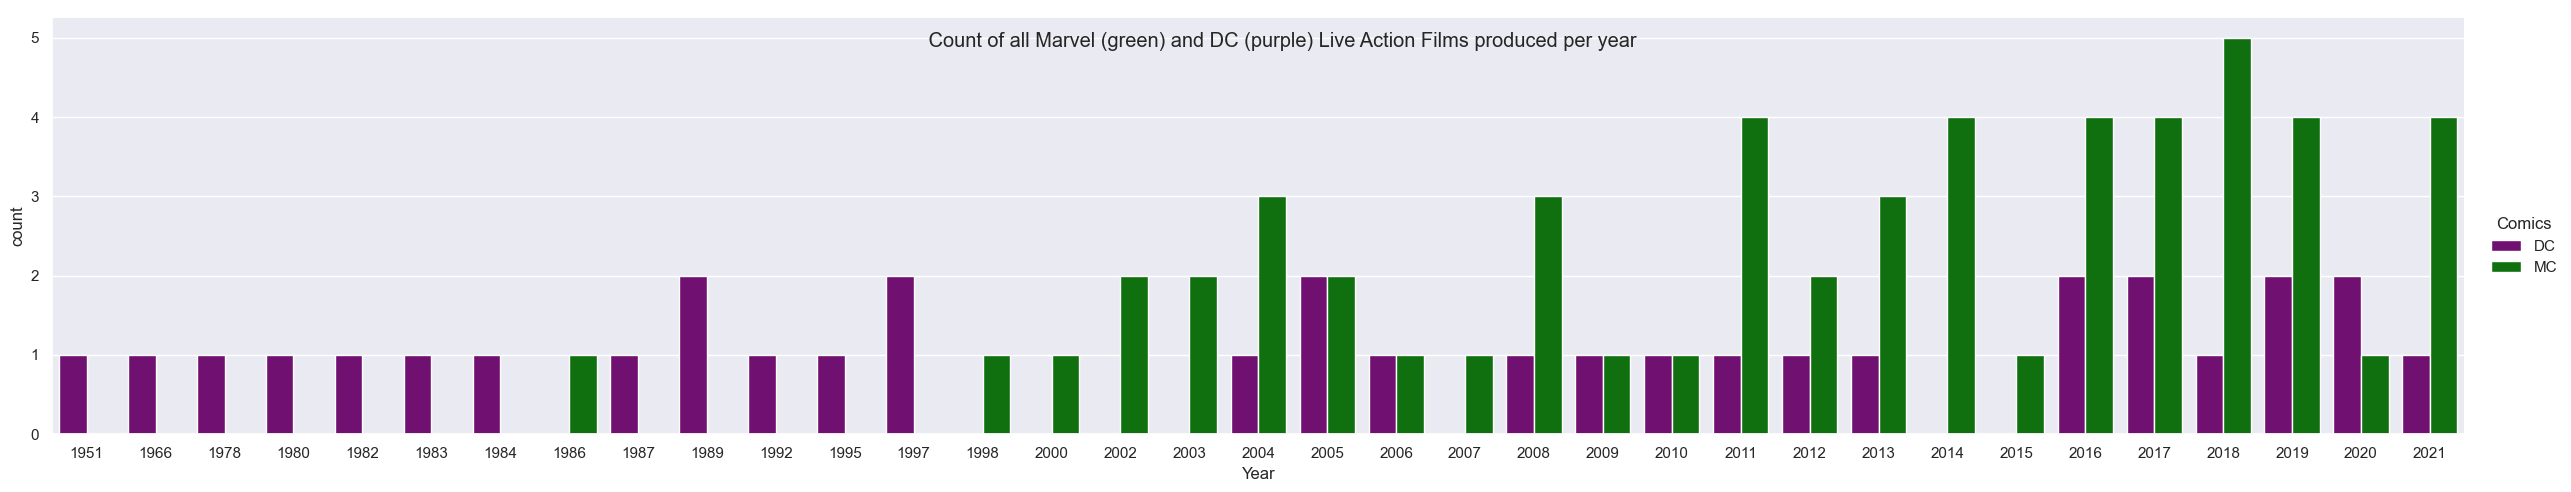

In [60]:
df_both = pd.DataFrame(count_merge).reset_index()
df_both = df_both.rename(columns = {0: "count"})
df_both = df_both.sort_values('Year', ascending=False)

sns.set_theme(style="darkgrid")
ax = sns.catplot(data=df_both, kind="bar", x="Year", hue = 'Comics', y='count', height=5, aspect=5, palette=sns.color_palette(['purple', 'green']))
ax.fig.suptitle('\n Count of all Marvel (green) and DC (purple) Live Action Films produced per year')

Análisis 1: Calificaciones promedio de Marvel vs. DC

Análisis 2: Distribución de géneros entre Marvel y DC


#### 5. Resultados obtenidos en el análisis:

1. Calificaciones promedio:

- Marvel tiene una calificación promedio de aproximadamente 6.2.
- DC tiene una calificación promedio de aproximadamente 6.0.
- Esto sugiere que las películas de Marvel, en promedio, tienen una ligera ventaja en calificación sobre las de DC.

2. Distribución de géneros:

- La gráfica de barras apiladas muestra la distribución de géneros como porcentaje del total en cada franquicia.
- Los géneros más comunes están bien representados y categorizados. Sin embargo:
   - Marvel tiene una gran proporción de géneros agrupados como "Otros" (~60%).
   - DC también tiene una cantidad significativa de géneros en "Otros" (~50%).
- Esto indica que ambas franquicias producen una diversidad de géneros, pero hay predominancia de ciertos géneros principales como acción y aventura.

3. Datos faltantes en Marvel:

- En el análisis de datos faltantes, se identificaron varias columnas con valores NaN, principalmente en información secundaria como "Director", "Actor" o "Presupuesto".
- Este problema podría afectar el análisis detallado en futuras investigaciones sobre Marvel si no se corrige.

4. Agrupación de géneros:

- Los géneros menos frecuentes (menos de 10 películas) se agruparon bajo "Otros" para simplificar la visualización.
- Esto ayudó a destacar los géneros más representativos en ambas franquicias, facilitando la comparación.